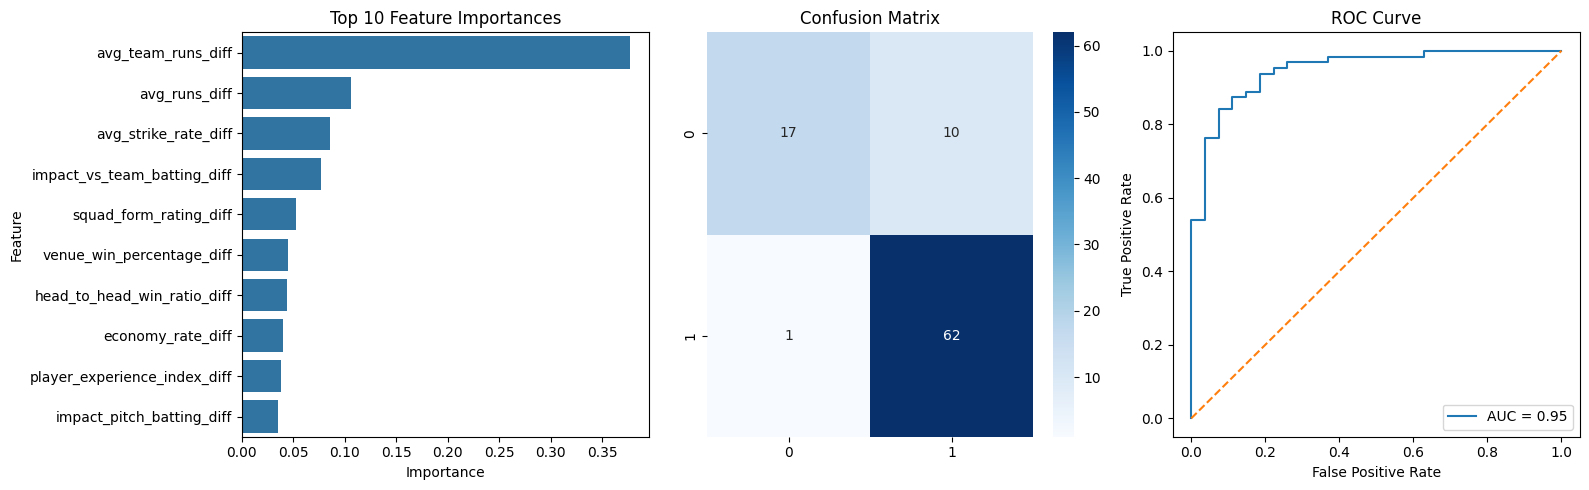

Accuracy: 0.88
Precision: 0.86
Recall: 0.98
F1 Score: 0.92


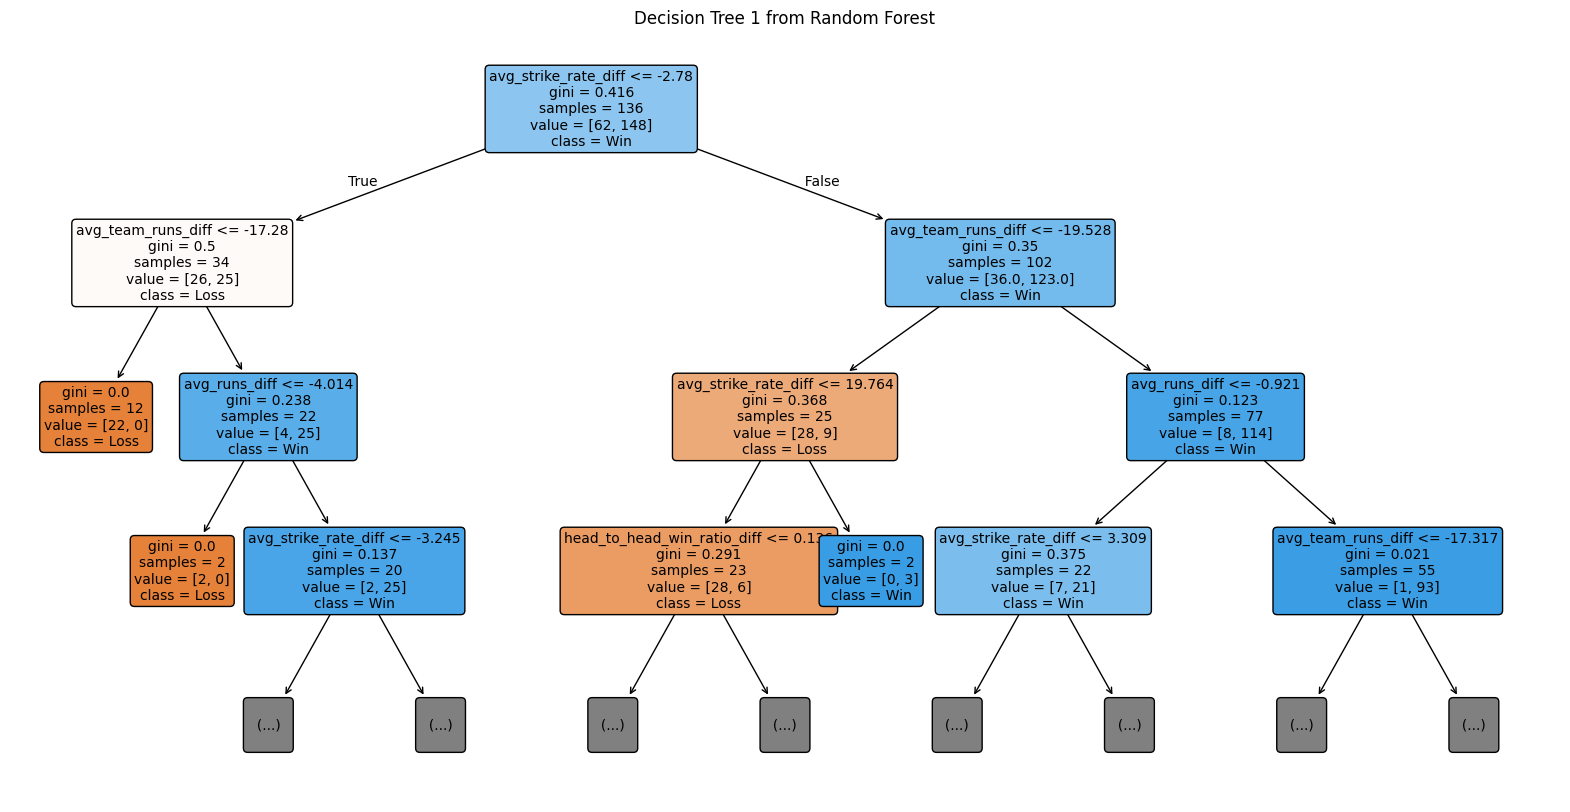

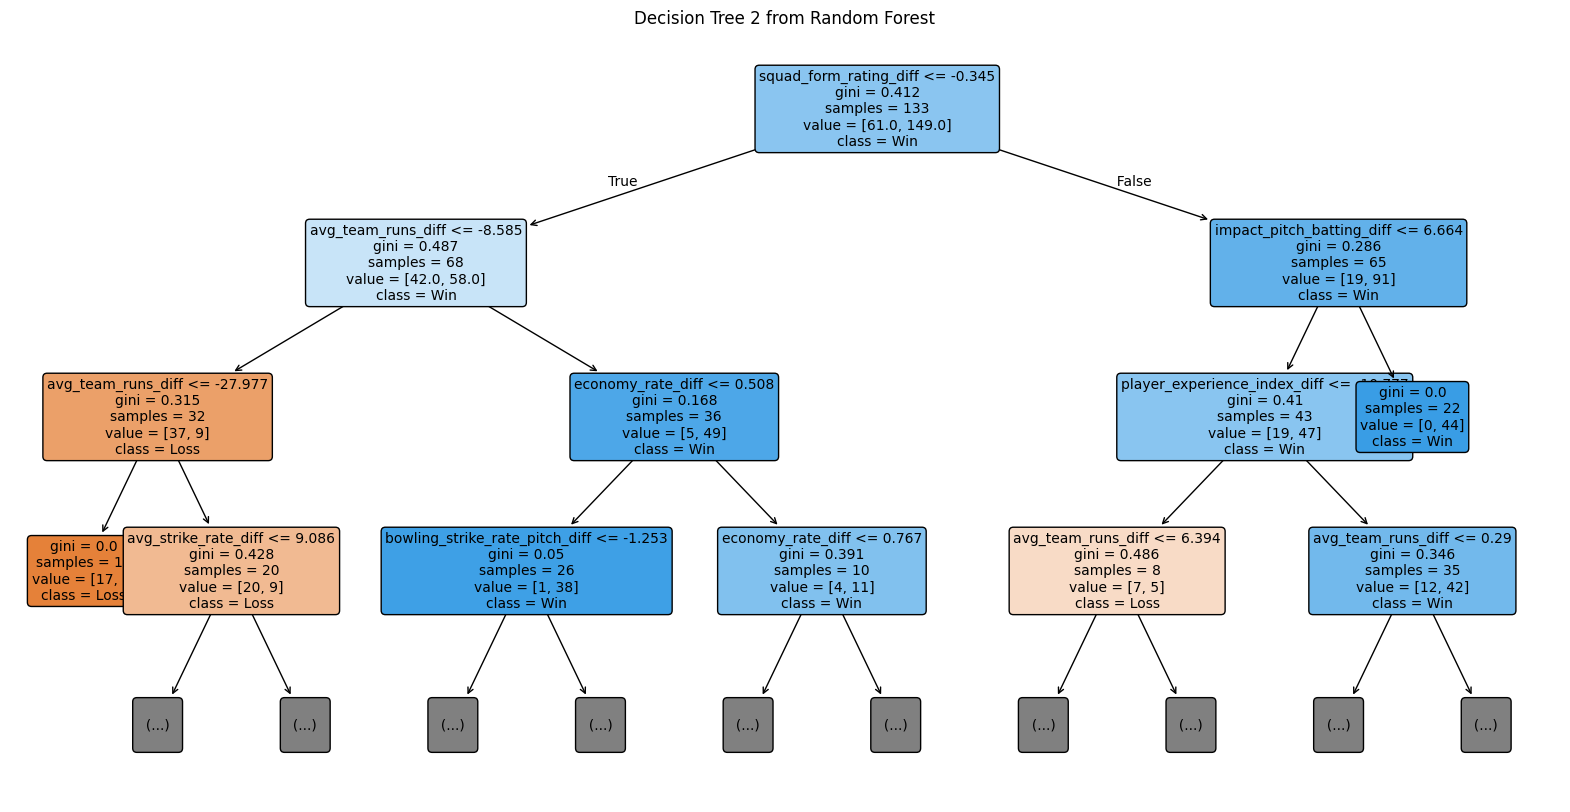

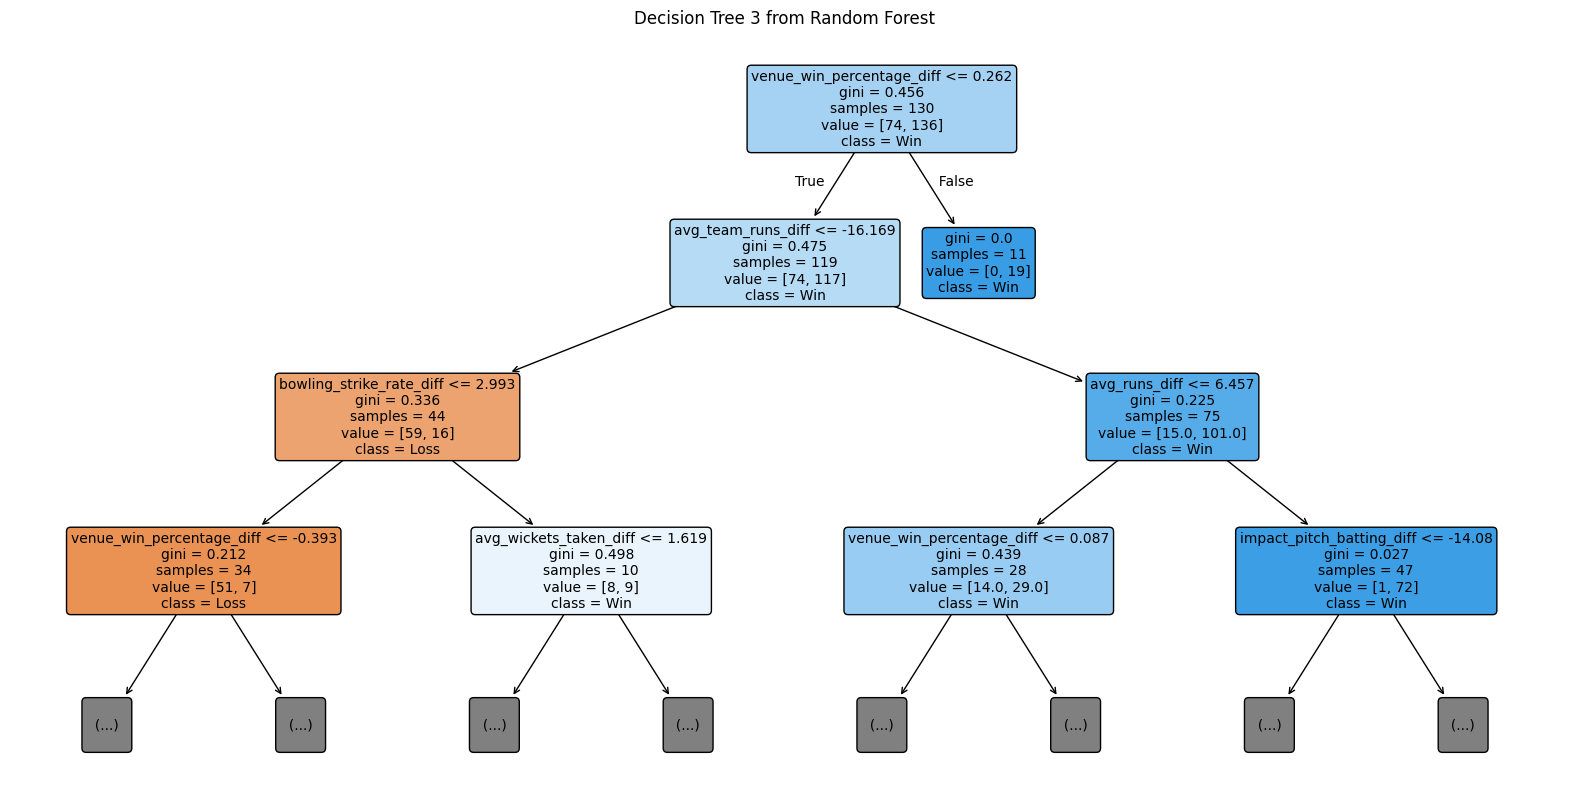

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_auc_score, roc_curve)
from sklearn.tree import plot_tree

# Load dataset
df = pd.read_csv("realistic_cricket_dataset.csv")

# Split features and target
X = df.drop("match_winner", axis=1)
y = df["match_winner"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Feature Importance
feat_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Visualizations
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(16, 5))

# Feature Importance
plt.subplot(1, 3, 1)
sns.barplot(x="Importance", y="Feature", data=feat_importance_df.head(10))
plt.title("Top 10 Feature Importances")

# Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")

# ROC Curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.tight_layout()
plt.show()

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# ---- Decision Tree Visualizations ----
# Visualize a few trees from the forest
for i in range(3):  # You can change the range for more trees
    plt.figure(figsize=(20, 10))
    plot_tree(model.estimators_[i], 
              feature_names=X.columns, 
              class_names=["Loss", "Win"], 
              filled=True, 
              rounded=True, 
              max_depth=3,  # visualize top few levels only
              fontsize=10)
    plt.title(f"Decision Tree {i+1} from Random Forest")
    plt.show()


In [2]:
df.columns

Index(['avg_strike_rate_diff', 'avg_runs_diff', 'impact_pitch_batting_diff',
       'impact_vs_team_batting_diff', 'economy_rate_diff',
       'bowling_strike_rate_diff', 'bowling_strike_rate_pitch_diff',
       'match_type_encoded', 'head_to_head_win_ratio_diff',
       'avg_team_runs_diff', 'avg_wickets_taken_diff',
       'squad_form_rating_diff', 'venue_win_percentage_diff',
       'player_experience_index_diff', 'match_winner'],
      dtype='object')

In [3]:
import joblib

# Save the trained model
joblib.dump(model, 'match_winner_predictor.pkl')
model = joblib.load("match_winner_predictor.pkl")

In [4]:
import pandas as pd

new_match_data = pd.DataFrame([{
    "avg_strike_rate_diff": ,                    
    "avg_runs_diff": ,                            
    "impact_pitch_batting_diff":,              
    "impact_vs_team_batting_diff":,            
    "economy_rate_diff": ,                     
    "bowling_strike_rate_diff":,                
    "bowling_strike_rate_pitch_diff": ,         
    "match_type_encoded": 0,                        # 0 for T20 
    "head_to_head_win_ratio_diff":,            
    "avg_team_runs_diff": ,                    
    "avg_wickets_taken_diff": ,                  
    "squad_form_rating_diff":,                 
    "venue_win_percentage_diff": ,              
    "player_experience_index_diff":            
}])



In [7]:
# Predict class (e.g., 0 = Loss, 1 = Win)
prediction = model.predict(new_match_data)[0]

# Predict probability
probability = model.predict_proba(new_match_data)[0]

print(f"Predicted Outcome: {'CSK' if prediction == 1 else 'PBKS'}")
print(f"Probability of Winning: {probability[1]:.2f}")
print(f"Probability of Losing: {probability[0]:.2f}")


Predicted Outcome: CSK
Probability of Winning: 0.88
Probability of Losing: 0.12
